In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import subprocess as sp
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
trainfile = pd.read_csv("train.csv")
testfile = pd.read_csv("test.csv")
print(testfile.shape)

(28000, 784)


In [3]:
trainfile = np.asarray(trainfile)
X = trainfile[:,1:].reshape(-1,28,28,1)
X = X.astype("float32")/255
Y = trainfile[:,0].reshape((trainfile[:,0].shape[0],1))

In [4]:
encoder = LabelBinarizer()
Y = encoder.fit_transform(Y)

In [5]:
print(X.shape)
print(Y)

(42000, 28, 28, 1)
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [6]:
X_train, X_cv, Y_train, Y_cv = train_test_split(X,Y, test_size=0.1)
X_test, X_cv, Y_test, Y_cv = train_test_split(X_cv,Y_cv, test_size=0.5)

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)

(37800, 28, 28, 1)
(37800, 10)
(2100, 28, 28, 1)
(2100, 10)


In [8]:
num_classes = 10
num_classes_sigmoid = 1
epochs = 15
#epochs = 20 <before>
batch_size = 128
#batch_size = 256 <before>
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(1024, activation='relu')) <was there before>
# model.add(Dropout(0.5)) <was there before>
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',   #was <'mean_squared_error'>
              optimizer='adam',
             metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [11]:
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_cv, Y_cv))

Train on 37800 samples, validate on 2100 samples
Epoch 1/15
37800/37800 [==============================] - 4s 115us/step - loss: 0.3952 - acc: 0.8703 - val_loss: 0.0809 - val_acc: 0.9729
Epoch 2/15
37800/37800 [==============================] - 3s 82us/step - loss: 0.1090 - acc: 0.9656 - val_loss: 0.0564 - val_acc: 0.9833
Epoch 3/15
37800/37800 [==============================] - 3s 84us/step - loss: 0.0796 - acc: 0.9748 - val_loss: 0.0465 - val_acc: 0.9852
Epoch 4/15
37800/37800 [==============================] - 3s 83us/step - loss: 0.0675 - acc: 0.9790 - val_loss: 0.0412 - val_acc: 0.9876
Epoch 5/15
37800/37800 [==============================] - 3s 84us/step - loss: 0.0560 - acc: 0.9823 - val_loss: 0.0317 - val_acc: 0.9914
Epoch 6/15
37800/37800 [==============================] - 3s 83us/step - loss: 0.0497 - acc: 0.9842 - val_loss: 0.0318 - val_acc: 0.9876
Epoch 7/15
37800/37800 [==============================] - 3s 83us/step - loss: 0.0462 - acc: 0.9854 - val_loss: 0.0256 - val_acc

Text(0.5,1,'Accuracy Curves')

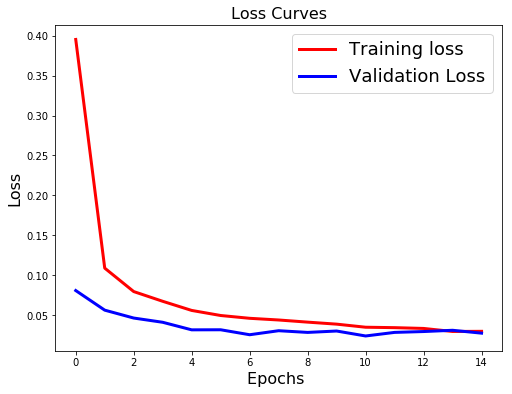

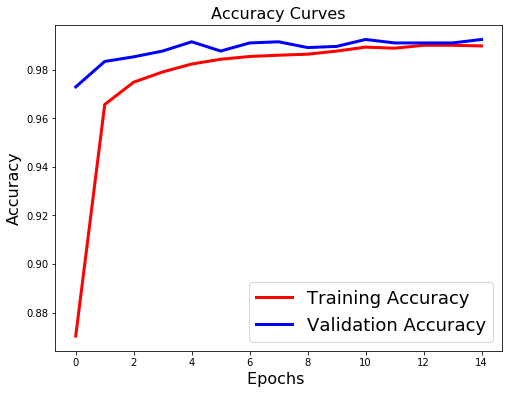

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [13]:
predict = model.predict(X_test)
loss , accu = model.evaluate(X_test,Y_test,verbose=1)
print(accu)
print(loss)

2100/2100 [==============================] - 0s 51us/step
0.9947619047619047
0.021075644289875135
